# **Clustering**
Clustering is a set of unsupervised methods for grouping data according to certain criteria into so-called clusters, which allows you to identify similarities and differences between objects, as well as simplify their analysis and visualization. Because of the partial similarity in the formulation of tasks with classification, clustering is also called *unsupervised classification*.

This article describes not only the principle of operation of popular clustering algorithms from simple to more advanced, but also presents their simplified implementations from scratch in Python, reflecting the basic idea. In addition, additional sources are indicated at the end of each section for more in-depth information.

## **Content**
- [Areas of clustering application and its varieties](#clustering_types)

- [K-Means](#k-means)

- [Agglomerative clustering](#agglomerative_clustering)

- [Spectral clustering](#spectral_clustering)

- [DBSCAN](#dbscan)

- [Affinity Propagation](#affinity_propagation)

<a name="clustering_types"></a>
## **Areas of clustering application and its varieties**

Clustering is widely used in machine learning to solve a variety of tasks:
- classification (determining which class each object belongs to or the allocation of new classes that were not known in advance);
- market segmentation (dividing potential customers into groups based on their characteristics to develop more effective marketing and sales strategies);
- image segmentation (dividing an image into segments or groups of pixels);
- clustering of geodata (grouping data by their geographical location, for example, dividing areas into safe and dangerous, rich and poor, and so on);
- reducing the dimension (reducing the number of features by combining similar ones into one cluster).

There are many different types of clustering, which can be divided according to the following criteria:

- **According to the method of cluster formation:**
 - Partitioning — split data into a given number of clusters, minimizing the distance within the cluster and maximizing the distance between clusters (for example, K-means).
 - Density-based — group points that are located in areas with high density and separates them from areas with low density (for example, DBSCAN).
 - Grid-based — divide the space into grid cells and analyze the density of data in each cell (for example, STING).
 - Model-based — assume that the data is generated by some statistical model and try to select the parameters of this model (for example, mixtures of Gaussians).
 - Graph-based — use a graph representation of the data and divide it into subgraphs corresponding to clusters (for example, spectral clustering).
 - Subspace-based — look for clusters in feature subspaces, rather than in the entire space (for example, CLIQUE).
 - Ensemble-based — combine the results of various clustering algorithms to obtain a more stable and reliable partitioning (for example, CSPA).

- **By the degree of cluster nesting:**
 - Flat — split the data into one level of clusters, without taking into account their hierarchy (for example, K-means).
 - Hierarchical — split the data into several levels of clusters, taking into account their hierarchy. There are two main approaches to hierarchical clustering: agglomerative (begins with each object being a separate cluster, and then gradually the closest clusters are combined into larger ones) and divisive (begins with all objects forming one cluster, and then gradually divided into smaller clusters).

- **By the degree of cluster intersection:**
 - Exclusive — each object belongs to only one cluster (for example, K-means).
 - Overlapping — each object can belong to several clusters (for example, MCOKE).
 - Fuzzy — each object belongs to each cluster with some degree of affiliation (for example, fuzzy K-means).

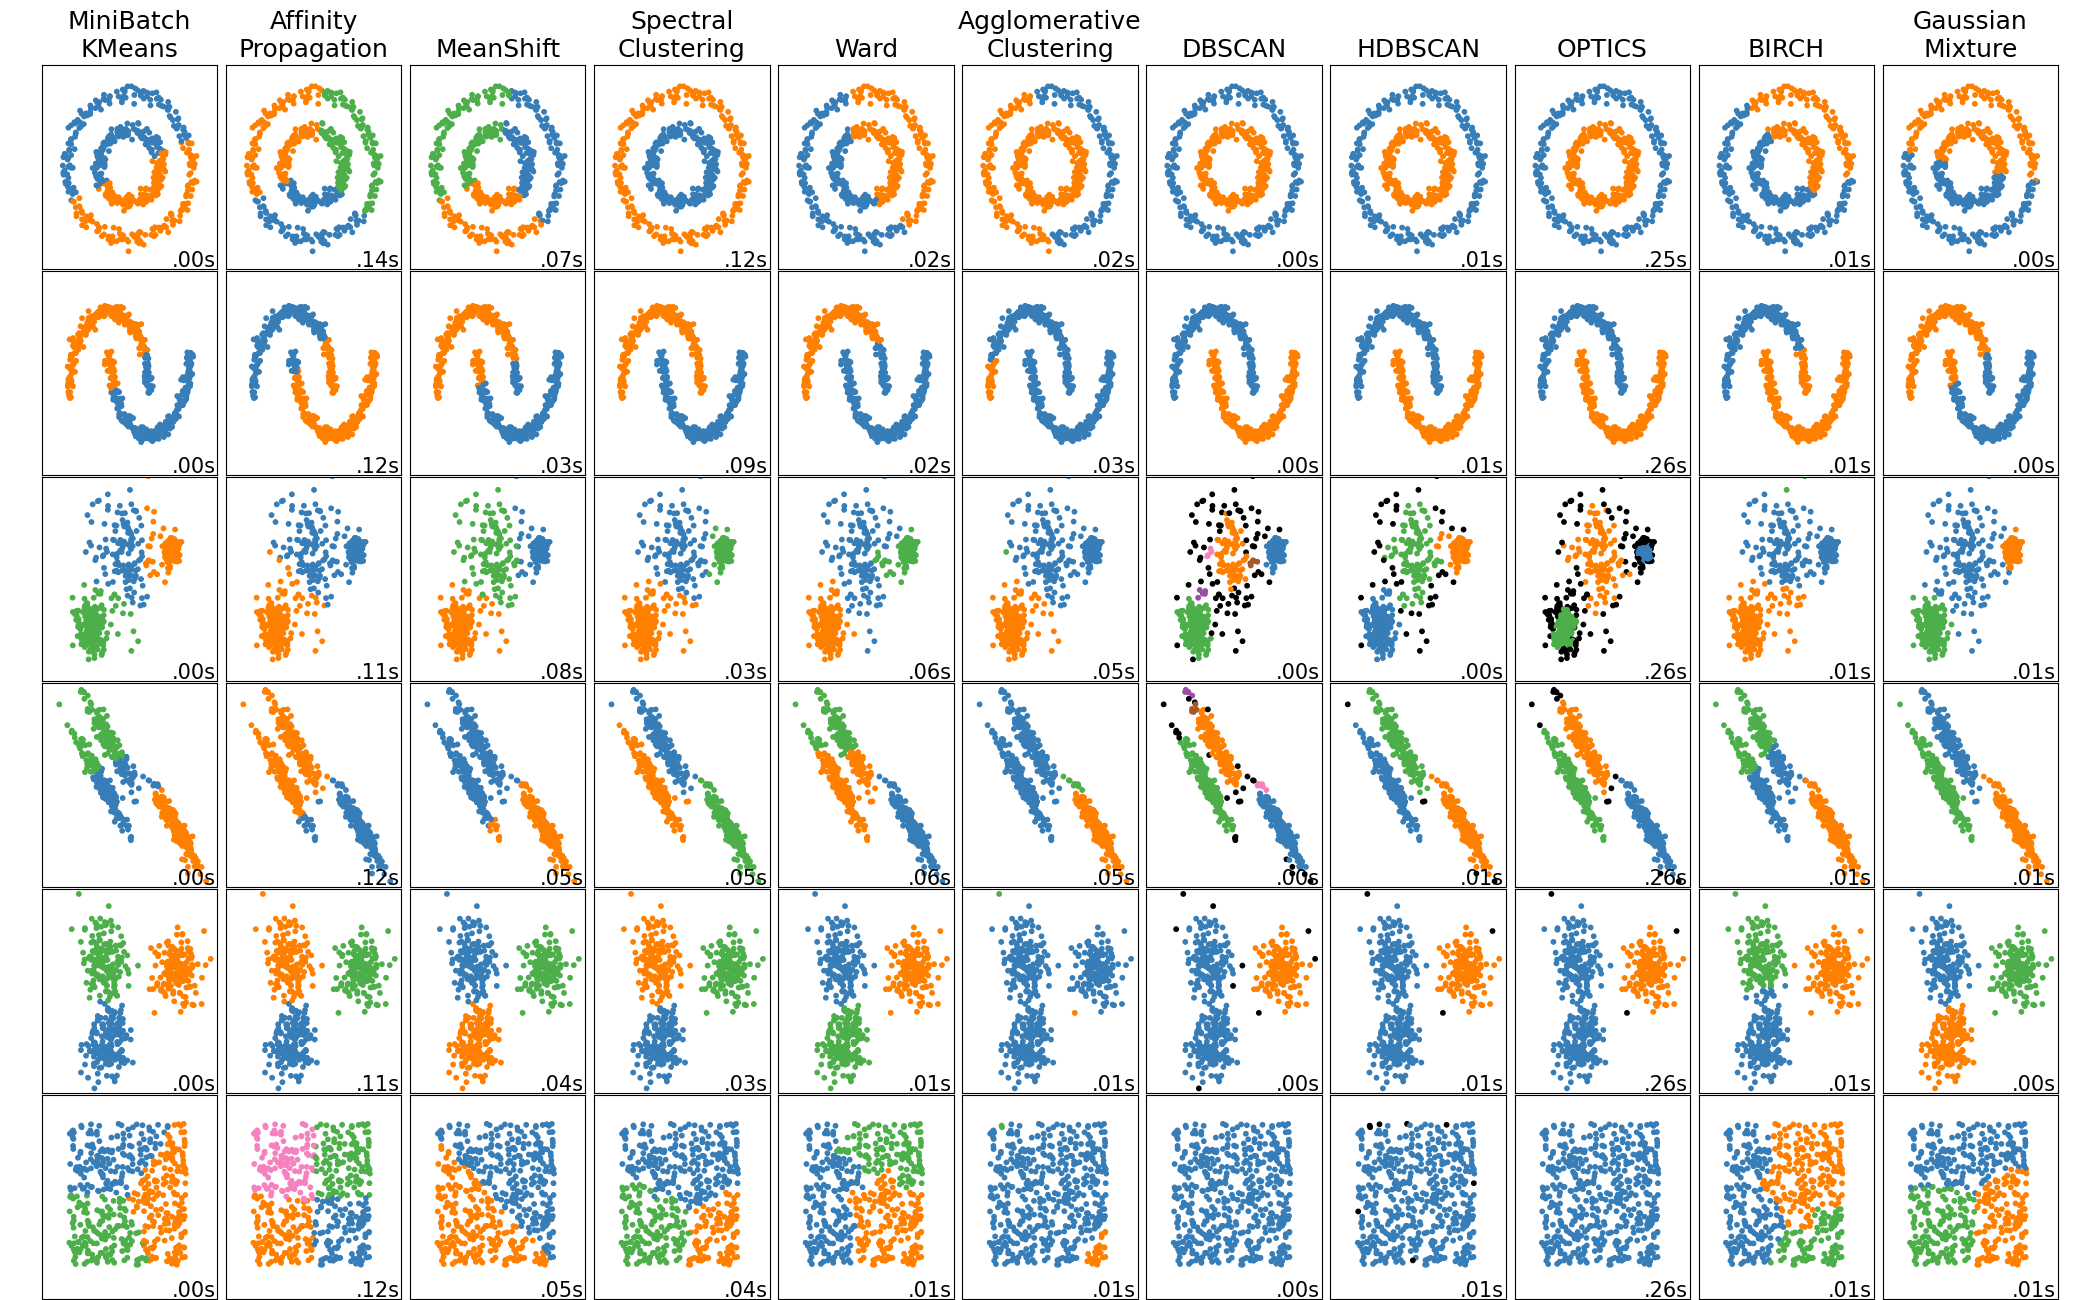

<a name="k-means"></a>
## **K-Means**
K-means clustering is one of the simplest implementations, the essence of which is the iterative initialization of the centroids for each cluster based on the arithmetic mean of the observations located in it, as well as their redefinition by minimizing the total quadratic deviation from the cluster centroids.

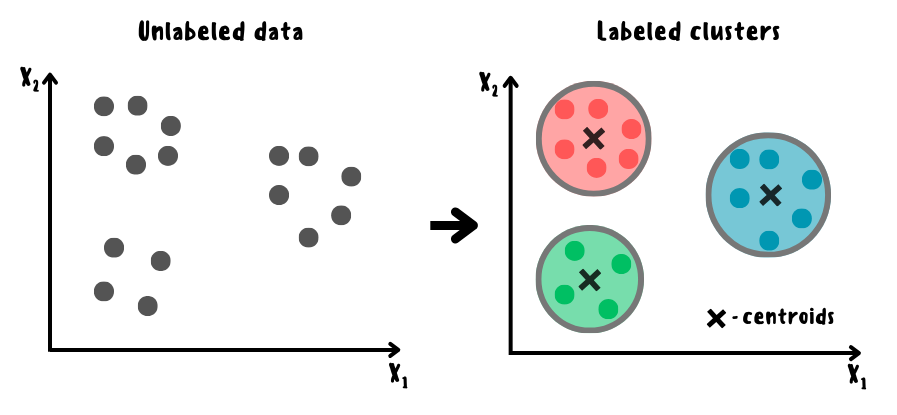

There are various variations of the K-Means algorithm that modify its steps or loss function to improve performance as well as applicability to different types of data. The most popular variations include the following:
- **Lloyd's algorithm** is a classic version of K-Means that works well for spherical clusters with the same density, but may produce poor results for other cluster shapes or sizes.

- **Elkan algorithm** is a faster version of the classic K-Means, which uses the triangle inequality to reduce the number of calculations of distances between objects and centroids, which may be more efficient on some datasets with well-defined clusters, however, more memory is required due to the allocation of an additional array size (n_samples, n_clusters).

- **Mini-batch K-Means** is a modification of the classic K-Means, using random subsamples of data at each iteration for training. It is well suited for large datasets.

- **K-Medoids** is a variant of K-Means, which selects real points (medoids) from the data as centroids, rather than their average values, which increases resistance to outliers.

- **K-Modes** is a variant of the K-Means algorithm for working with categorical data, which selects one of the objects in the cluster as a mode and minimizes the sum of Hamming distances between the mode and objects in the cluster. The Hamming distance is the number of positions where the values of the vectors do not match.

One of the key issues when using K-Means is the choice of initial centroids, since the quality and speed of convergence of the algorithm depend on them. There are several ways to initialize centroids:

- **Random selection**: k random points are selected from the data as initial centroids. This method is simple, but can lead to poor results if the initial centroids are too close to each other or to the edges of the distribution.

- **K-Means++**: The first centroid is selected randomly, and then the remaining centroids are selected with a probability proportional to the square of the distance to the nearest already selected centroid. This method improves the quality of clustering, reducing the probability of falling into the local minimum, but requires additional calculations.

- **Greedy K-Means++** is a modification of K-Means++ that accelerates convergence and improves the quality of clustering due to the fact that at each step, when choosing the cluster center, several attempts are made and the best one is selected (the one that minimizes the total quadratic deviation of points from cluster centers).

Another important aspect affecting the quality of the algorithm is the selection of the optimal number of clusters k, which is set manually in advance. There are several methods for choosing the optimal k:
- **Elbow method** based on a plot of the sum of squares of distances between objects and cluster centroids (SSE) as a function of k. The optimal k is the point after which the SSE decreases slightly.

- **Silhouette method** based on a plot of the average silhouette value for each k. Silhouette is a measure of how well an object is related to its cluster compared to other clusters. The optimal k is the point where the silhouette reaches its maximum.

- **A comprehensive assessment method** based on the analysis of several criteria, such as the dynamics of the redistribution of objects in clusters, changes in the potential energy of objects within clusters and the characteristic points of the plots of these criteria. The optimal k is considered to be a point that satisfies a set of rules using these criteria.

### **How Lloyd's K-Means works with the initialization of Greedy K-Means++**
The algorithm is constructed as follows:
- 1) cluster centroids are initially calculated using the Greedy K-Means++ algorithm;
- 2) next, the square of the Euclidean (or other) distance from each observation to the centroids is calculated;
- 3) based on the distance obtained, the observations are assigned cluster labels that are closest to them, and inertia is calculated (a measure of how well the data was divided into clusters);
- 4) steps 2-3 are repeated until the inertia in the current and previous iterations stops changing less than the set threshold (until the position of the centroids stops changing in space) or until the set number of iterations is reached;
- 5) The observations located closest to the obtained centroids will form clusters.

**The principle of operation of the Greedy K-Means++ algorithm:**
- 1) the first centroid is randomly selected from the data;
- 2) for each next centroid, a point in the data is selected with a probability proportional to the square of the distance to the nearest centroid among several candidates selected randomly;
- 3) This process is repeated until the set number of centroids is selected.

### **Python implementation from scratch**

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

In [ ]:
class KMeansClustering:
    def __init__(self, n_clusters=8, max_iter=300, tol=0.0001, random_state=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def _greedy_kmeans_plus_plus(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        n_local_trials = 2 + int(np.log(self.n_clusters))

        indices = np.arange(n_samples)
        first_index = np.random.choice(indices)
        centers = np.zeros((self.n_clusters, n_features))

        centers[0] = X[first_index]
        first_center = centers[0].reshape(1, -1)
        sq_distances = cdist(X, first_center, metric='sqeuclidean').ravel()

        for i in range(1, self.n_clusters):
            min_cost = np.inf
            min_new_sq_distances = []
            best_candidate_index = None

            for _ in range(n_local_trials):
                candidates_probas = sq_distances / np.sum(sq_distances)
                candidate_index = np.random.choice(indices, p=candidates_probas)
                candidate = X[candidate_index].reshape(1, -1)

                new_sq_distances = cdist(X, candidate, metric='sqeuclidean').ravel()
                new_cost = np.sum(np.minimum(sq_distances, new_sq_distances))

                if new_cost < min_cost:
                    best_candidate_index = candidate_index
                    min_new_sq_distances = new_sq_distances
                    min_cost = new_cost

            centers[i] = X[best_candidate_index]   # Choose the new center
            sq_distances = np.minimum(sq_distances, min_new_sq_distances)

        return centers

    def fit(self, X):
        n_samples, n_features = X.shape
        self.inertia_ = np.inf
        self.cluster_centers_ = self._greedy_kmeans_plus_plus(X)

        # Lloyd's algorithm
        for _ in range(self.max_iter):
            distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
            labels = np.argmin(distances, axis=1)
            new_inertia = np.sum(np.min(distances, axis=1))
            new_centers = np.zeros((self.n_clusters, n_features))

            for k in range(self.n_clusters):
                new_centers[k] = np.mean(X[labels == k], axis=0)

            if np.abs(new_inertia - self.inertia_) < self.tol:
                break

            self.inertia_ = new_inertia
            self.cluster_centers_ = new_centers

    def predict(self, X):
        distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
        predicted_labels = np.argmin(distances, axis=1)

        return predicted_labels

### **Uploading a dataset**

In [ ]:
X1, y1 = make_blobs(n_samples=250, n_features=2, centers=8, random_state=0)
print(y1)

[1 3 7 7 6 7 1 3 7 7 0 3 1 1 3 3 5 1 7 4 0 1 1 3 4 7 0 0 6 7 0 0 5 5 7 2 1
 1 6 5 4 7 1 2 1 1 4 3 6 4 7 3 0 2 2 1 7 2 4 0 0 0 1 4 6 5 0 4 6 6 4 4 1 4
 2 3 1 1 5 4 6 4 1 2 5 0 7 6 7 3 0 1 2 5 1 5 3 3 3 1 5 4 0 4 7 6 2 2 2 4 6
 2 5 1 6 4 0 6 5 0 0 6 3 5 1 6 0 2 5 5 6 3 3 1 5 4 5 0 2 2 3 0 4 7 5 4 2 0
 2 6 2 5 2 1 4 1 5 0 4 6 7 5 5 7 6 2 2 3 6 1 7 3 4 7 2 6 6 4 2 2 0 5 4 4 6
 3 1 7 6 7 7 0 4 5 7 2 6 6 2 5 3 3 2 7 1 7 6 6 4 3 5 7 6 3 5 0 3 3 5 5 2 0
 6 3 4 0 5 3 5 2 0 6 4 0 1 1 2 2 0 1 3 7 0 7 0 3 4 7 3 7]


### **Model training and evaluation of the obtained results**
As you can see K-Means gave a fairly good but not perfect clustering of data, due to the presence of a small number of outliers and a more complex shape of some clusters than spherical.

**KMeans**

In [ ]:
kmeans = KMeansClustering(n_clusters=8, random_state=0)
kmeans.fit(X1)
kmeans_pred_res = kmeans.predict(X1)
kmeans_ari = adjusted_rand_score(y1, kmeans_pred_res)
kmeans_centroinds = kmeans.cluster_centers_
print(f'Adjusted Rand Score for KMeans: {kmeans_ari}', '', sep='\n')
print('centroids', kmeans_centroinds, '', sep='\n')
print('prediction', kmeans_pred_res, sep='\n')

Adjusted Rand Score for KMeans: 0.8082423809657193

centroids
[[ 9.20217726 -2.23709633]
 [-1.5438023   7.64224793]
 [-8.61527648 -8.32916569]
 [ 0.81231976  4.02302811]
 [-1.81106448  2.87987747]
 [ 2.3666746   1.30457024]
 [ 1.47433518  8.49698324]
 [ 5.86512606  0.19818122]]

prediction
[5 1 2 2 6 2 5 1 2 2 5 1 5 5 1 1 5 5 2 0 3 7 3 1 0 2 3 3 6 2 1 3 7 7 2 4 5
 5 6 7 0 2 5 4 5 5 0 1 6 7 2 1 3 3 4 5 2 4 0 3 3 3 5 0 6 7 3 0 6 6 0 0 5 0
 3 1 5 5 7 0 3 0 5 4 7 3 2 6 2 6 3 5 4 5 5 7 1 1 1 3 7 0 3 0 2 6 3 4 4 0 6
 4 7 5 1 0 3 6 7 3 3 6 1 7 5 6 3 4 7 7 6 1 1 5 7 0 7 3 4 4 1 3 0 2 7 0 4 3
 4 6 4 7 4 5 0 5 7 3 0 6 2 7 5 2 6 4 3 3 6 5 2 1 0 2 4 6 6 0 4 4 3 7 0 0 6
 1 5 2 6 2 2 3 0 7 2 4 6 6 4 7 1 1 4 2 5 2 6 1 0 1 5 2 6 6 7 3 1 1 7 7 4 3
 6 1 0 3 7 1 7 4 4 6 0 3 5 5 4 4 3 3 1 2 3 2 3 1 0 2 1 2]


**KMeans (scikit-learn)**

In [ ]:
sk_kmeans = KMeans(n_clusters=8, n_init='auto', random_state=0)
sk_kmeans.fit(X1)
sk_kmeans_pred_res = sk_kmeans.predict(X1)
sk_kmeans_ari = adjusted_rand_score(y1, sk_kmeans_pred_res)
sk_kmeans_centroinds = sk_kmeans.cluster_centers_
print(f'Adjusted Rand Score for sk KMeans: {sk_kmeans_ari}', '', sep='\n')
print(sk_kmeans_centroinds, '', sep='\n')
print('prediction', sk_kmeans_pred_res, sep='\n')

Adjusted Rand Score for sk KMeans: 0.8082423809657193

[[ 9.20217726 -2.23709633]
 [-1.5438023   7.64224793]
 [-8.61527648 -8.32916569]
 [ 0.81231976  4.02302811]
 [-1.81106448  2.87987747]
 [ 2.3666746   1.30457024]
 [ 1.47433518  8.49698324]
 [ 5.86512606  0.19818122]]

prediction
[5 1 2 2 6 2 5 1 2 2 5 1 5 5 1 1 5 5 2 0 3 7 3 1 0 2 3 3 6 2 1 3 7 7 2 4 5
 5 6 7 0 2 5 4 5 5 0 1 6 7 2 1 3 3 4 5 2 4 0 3 3 3 5 0 6 7 3 0 6 6 0 0 5 0
 3 1 5 5 7 0 3 0 5 4 7 3 2 6 2 6 3 5 4 5 5 7 1 1 1 3 7 0 3 0 2 6 3 4 4 0 6
 4 7 5 1 0 3 6 7 3 3 6 1 7 5 6 3 4 7 7 6 1 1 5 7 0 7 3 4 4 1 3 0 2 7 0 4 3
 4 6 4 7 4 5 0 5 7 3 0 6 2 7 5 2 6 4 3 3 6 5 2 1 0 2 4 6 6 0 4 4 3 7 0 0 6
 1 5 2 6 2 2 3 0 7 2 4 6 6 4 7 1 1 4 2 5 2 6 1 0 1 5 2 6 6 7 3 1 1 7 7 4 3
 6 1 0 3 7 1 7 4 4 6 0 3 5 5 4 4 3 3 1 2 3 2 3 1 0 2 1 2]


**Predictions visualization**

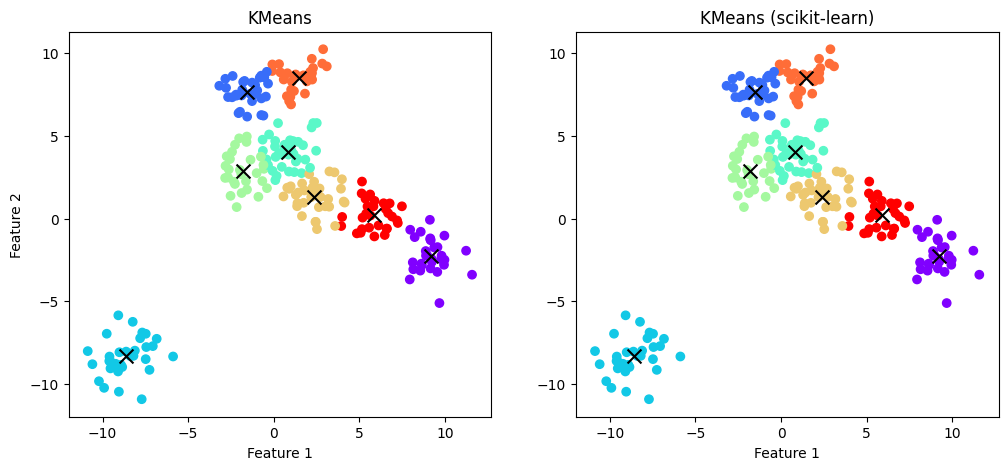

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_pred_res, cmap="rainbow")
plt.scatter(kmeans_centroinds[:, 0], kmeans_centroinds[:, 1], marker="x", color="black", s=100)
plt.title("KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X1[:, 0], X1[:, 1], c=sk_kmeans_pred_res, cmap="rainbow")
plt.scatter(sk_kmeans_centroinds[:, 0], sk_kmeans_centroinds[:, 1], marker="x", color="black", s=100)
plt.title("KMeans (scikit-learn)")
plt.xlabel("Feature 1")

plt.show()

### **Pros and cons of K-Means**
Pros:
- easy to implement and understand;
- the presence of a large number of modifications;
- high speed and accuracy on spherical shape of data.

Cons:
- low accuracy on data with non-spherical cluster shape;
- sensitivity to initial values of centroids and outliers;
- the need to set the number of clusters in advance, which may be difficult or not optimal.

### **Additional sources**
Paper «Improved Guarantees for k-means++ and k-means++ Parallel», Konstantin Makarychev, Aravind Reddy and Liren Shan.

Documentation:
- [K-Means description](https://scikit-learn.org/stable/modules/clustering.html#k-means);
- [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Video:
- [one](https://www.youtube.com/watch?v=4b5d3muPQmA);
- [two](https://www.youtube.com/watch?v=4E_DFMt60rc).

<a name="agglomerative_clustering"></a>
## **Agglomerative clustering**
Alglomerative clustering is a hierarchical clustering method that combines objects into clusters based on their proximity. The clustering process begins with the fact that initially each object is considered a separate cluster and then at each step the two closest clusters merge into one until the desired number of clusters or one common cluster is reached.

An important aspect in alglomerative clustering is the way to calculate the distance between clusters which is called linkage. There are several methods for calculating the linkage:
- **Single linkage method:** the distance between clusters is equal to the minimum distance between points from different clusters. This method tends to create long and winding clusters.
- **Complete linkage method:** the distance between clusters is equal to the maximum distance between points from different clusters. This method tends to create compact and spherical clusters.
- **The average linkage method:** the distance between clusters is equal to the average distance between all pairs of points from different clusters. This method is a compromise between single and full connection methods.
- **Ward's method (Ward's linkage):** the distance between clusters is equal to the increment of the sum of the squares of the distances from the points to the cluster centroids when these clusters are combined. This method aims to minimize intracluster dispersion.

$d_{\min}(C_i, C_j) = \min_{x \in C_i, y \in C_j} \rho(x, y) \ - \ $ single linkage

$d_{\max}(C_i, C_j) = \max_{x \in C_i, y \in C_j} \rho(x, y) \ - \ $ complete linkage

$d_{\text{avg}}(C_i, C_j) = \frac{1}{n_i n_j} \sum_{x \in C_i} \sum_{y \in C_j} \rho(x, y) \ - \ $ average linkage

$d_{\text{ward}}(C_i, C_j) = \frac{n_i n_j}{n_i + n_j} \rho^2(\bar{x}_i, \bar{x}_j) \ - \ $ Ward's linkage

### **The principle of operation of agglomerative clustering based on the Ward's method**
The algorithm is constructed as follows:
- 1) for each pair of clusters the Ward distance is calculated based on the Euclidean distance;
- 2) labels with a minimum distance that are the nearest clusters are combined into a new one as follows: all objects of one cluster are assigned labels of another, after which all new labels that are larger than the labels of another cluster are reduced by 1, that is their numbering is shifted to the left to eliminate gaps in the sequence;
- 3) Steps 1-2 are repeated until the number of clusters is greater than the target n_clusters.

### **Python implementation from scratch**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import sqeuclidean
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
class HierarchicalAgglomerativeClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters

    @staticmethod
    def _ward_distance(c1, c2):
        n1, n2 = len(c1), len(c2)
        c1_mean, c2_mean = np.mean(c1, axis=0), np.mean(c2, axis=0)
        sqeuclidean_dist = sqeuclidean(c1_mean, c2_mean)

        return (n1 * n2) / (n1 + n2) * sqeuclidean_dist

    @staticmethod
    def _update_labels(labels, min_cdist_idxs):
        # assign a cluster number to labels
        labels[labels == min_cdist_idxs[1]] = min_cdist_idxs[0]
        labels[labels > min_cdist_idxs[1]] -= 1

        return labels

    def fit_predict(self, X):
        labels = np.arange(len(X))
        clusters = [[x] for x in X]

        while len(clusters) > self.n_clusters:
            min_cdist, min_cdist_idxs = np.inf, []

            for i in range(len(clusters) - 1):
                for j in range(i + 1, len(clusters)):
                    cdist = self._ward_distance(clusters[i], clusters[j])

                    if cdist < min_cdist:
                        min_cdist = cdist
                        min_cdist_idxs = (i, j)

            labels = self._update_labels(labels, min_cdist_idxs)
            clusters[min_cdist_idxs[0]].extend(clusters.pop(min_cdist_idxs[1]))

        return np.array(labels)

### **Uploading a dataset**

In [ ]:
X2, y2 = make_blobs(n_samples=75, n_features=2, centers=5, random_state=0)
print(y2)

[0 3 4 3 2 4 0 2 0 4 2 4 2 2 0 0 0 3 2 0 2 2 2 3 4 1 1 2 3 0 4 4 3 3 3 2 2
 0 1 1 3 1 0 2 4 1 4 4 0 4 1 0 3 0 4 1 2 1 4 3 1 1 3 0 3 4 1 2 1 4 0 3 1 1
 3]


### **Model training and evaluation of the obtained results**
In this case agglomerative clustering also coped quite well but when comparing plots, you can see that the labels of the manual implementation have different values and the color on the plot accordingly. This is due to a different order of cluster formation: scikit-learn uses a data structure known as a linkage tree, which allows you to visualize the hierarchy of clusters using a tree diagram (dendogram), which can be useful when choosing the optimal number of clusters. It is worth noting that the order of cluster formation does not affect the quality of clustering, since the cluster labels themselves are separated correctly, as can be seen from the same ARI values.

**AgglomerativeClustering**

In [ ]:
ac = HierarchicalAgglomerativeClustering(n_clusters=5)
ac_pred_res = ac.fit_predict(X2)
ac_ari = adjusted_rand_score(y2, ac_pred_res)
print(f'Adjusted Rand Score for AgglomerativeClustering: {ac_ari}', '', sep='\n')
print('prediction', ac_pred_res, sep='\n')

Adjusted Rand Score for AgglomerativeClustering: 0.8370870157432925

prediction
[0 1 2 0 3 2 0 3 0 2 3 2 3 3 0 0 0 1 3 0 3 3 0 1 2 4 4 3 1 3 2 2 1 1 1 3 3
 0 4 4 1 4 0 3 2 4 2 2 3 2 4 0 1 0 2 4 3 4 2 1 4 4 1 0 1 2 4 3 3 2 0 1 4 4
 1]


**AgglomerativeClustering (scikit-learn)**

In [ ]:
sk_ac = AgglomerativeClustering(n_clusters=5, linkage='ward')
sk_ac_pred_res = sk_ac.fit_predict(X2)
sk_ac_ari = adjusted_rand_score(y2, sk_ac_pred_res)
print(f'Adjusted Rand Score for sk AgglomerativeClustering: {sk_ac_ari}', '', sep='\n')
print('prediction', sk_ac_pred_res, sep='\n')

Adjusted Rand Score for sk AgglomerativeClustering: 0.8370870157432925

prediction
[4 2 1 4 0 1 4 0 4 1 0 1 0 0 4 4 4 2 0 4 0 0 4 2 1 3 3 0 2 0 1 1 2 2 2 0 0
 4 3 3 2 3 4 0 1 3 1 1 0 1 3 4 2 4 1 3 0 3 1 2 3 3 2 4 2 1 3 0 0 1 4 2 3 3
 2]


**Predictions visualization**

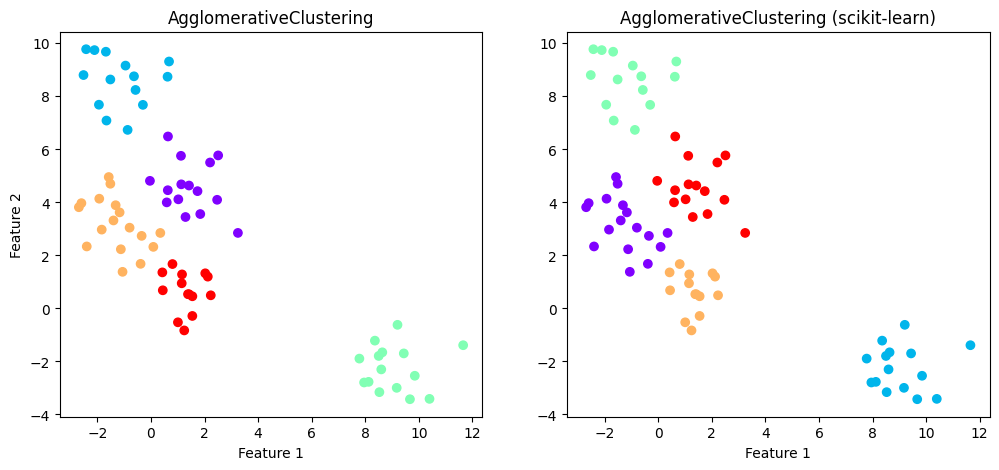

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X2[:, 0], X2[:, 1], c=ac_pred_res, cmap='rainbow')
plt.title('AgglomerativeClustering')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=sk_ac_pred_res, cmap='rainbow')
plt.title('AgglomerativeClustering (scikit-learn)')
plt.xlabel("Feature 1")

plt.show()

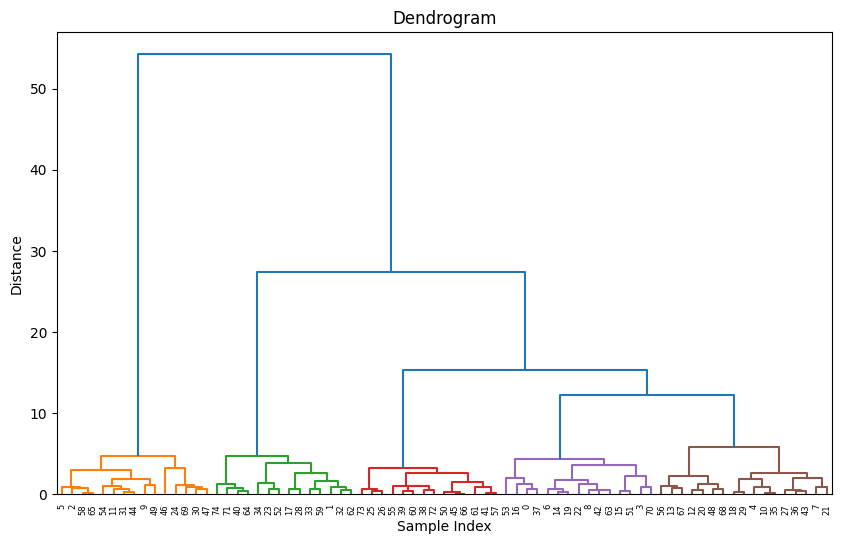

In [ ]:
linkage_matrix = linkage(X2, method='ward', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

### **Pros and cons of Agglomerative Clustering**
Pros:
- adaptation to different situations and the ability to detect clusters of arbitrary shape;
- the possibility of forming an informative hierarchy of clusters which allows you to choose the optimal number of clusters or better understand the data structure.

Cons:
- using a large amount of computing resources and memory due to working with the entire distance matrix between objects;
- sensitivity to the choice of criteria for combining clusters, as well as instability to noise and outliers which can greatly distort the hierarchy of clusters.

### **Additional sources**
Paper «Modern hierarchical, agglomerative clustering algorithms», Daniel Müllner.

Documentation:
- [AgglomerativeClustering description](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering);
- [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

Video:
- [one](https://www.youtube.com/watch?v=7xHsRkOdVwo);
- [two](https://www.youtube.com/watch?v=OcoE7JlbXvY);
- [three](https://www.youtube.com/watch?v=esmzYhuFnds).

<a name="spectral_clustering"></a>
## **Spectral clustering**
Spectral clustering is a clustering method based on the spectral properties of the similarity matrix of a graph, which is a set of data points connected to each other depending on their similarity. The main idea is to transform the similarity matrix of a graph into a laplacian to obtain its eigenvectors, which are then used to project data into a new lower-dimensional space for better separability, where another clustering method is then applied, for example, such as k-means.

There are various ways to build a similarity matrix among which the most popular are the following:
- **nearest_neighbors** (by calculating the nearest neighbor graph);
- **rbf** (using the radial basis function);
- **precomputed**, where the features are represented as a similarity matrix or nearest neighbor graph;
- **various kernels:** xi-square, linear, polynomial, sigmoidal and others.

There are also various strategies for decomposing the Laplacian into eigenvectors and values:

- **ARPACK** (ARnoldi PACKage) is a software package in the Fortran language that implements the Arnoldi iterative method for finding multiple eigenvalues and eigenvectors of a large sparse matrix. The Arnoldi method is a generalization of the Lanczos method which builds an orthogonal basis of the Krylov subspace generated by the matrix and the initial vector and then projects the original eigenproblem onto this subspace.
- **LOBPCG** (Locally Optimal Block Preconditioned Conjugate Gradient) is a method that implements a locally optimal, blocky, preconditioned, conjugate gradient to find several smallest modulo eigenvalues and eigenvectors of a large positive definite matrix. The main idea of LOBPCG is that at each iteration it chooses the next approximation to the eigenvector so as to minimize the quadratic shape associated with the eigenproblem on the subspace generated by the current approximation, the preconditioned remainder and the last update. This is done using the Rayleigh-Ritz method, which finds optimal linear combinations of these vectors.
- **AMG** (Algebraic Multigrid methods) is a class of algorithms for solving large systems of equations arising from the discretization of differential equations. In the context of clustering, AMG methods reduce the size of the matrix by transferring it to a coarse grid, where it has fewer elements but retains its properties. This is done using two operations: smoothing and correction. Smoothing is a simple iterative method that reduces the error in the approximate solution of its own problem. Correction is a transition to a coarse grid where a simplified proprietary problem is solved and then returns to a fine grid to correct the solution. This process is repeated several times until the desired accuracy is achieved.

It is worth noting that the last 2 methods are faster but less stable.

### **The principle of operation of ARPACK spectral clustering with RBF kernel**
The algorithm is constructed as follows:
- 1) based on the similarity matrix of a graph its normalized laplacian and a diagonal matrix of degrees of vertices of the graph are constructed;
- 2) next, using the ARPACK algorithm k-eigenvectors of the Laplacian are calculated, indicating a shift to accelerate calculations (sigma), a random vector (v0), as well as the largest modulo eigenvalues (which="LM") since they will be located closest to the shift, which will eventually return the smallest eigenvectors;
- 3) the obtained vectors are normalized according to the degrees of the vertices of the graph in order to be independent of the weights of the vertices, after which the sign in these vectors changes to become deterministic (this approach avoids ambiguity in the signs of the eigenvectors when using different implementations of the algorithm);
- 4) an embedding matrix is formed from the modified eigenvectors to which the K-Means algorithm is applied which ultimately predicts the final labels.

**Formulas for calculations**

$L = I - D^{-\frac{1}{2}} \ - \ $ normalized Laplacian

$I \ - \ $ unit matrix

$D \ - \ $ diagonal matrix of vertex degrees

### **Python implementation from scratch**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from scipy.sparse.csgraph import laplacian as csgraph_laplacian
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
class ArpackSpectralClustering:
    def __init__(self, n_clusters=8, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    @staticmethod
    def _deterministic_vector_sign_flip(u):
        # Flip the sign of the vectors to make them deterministic
        max_abs_rows = np.argmax(np.abs(u), axis=1)
        signs = np.sign(u[range(u.shape[0]), max_abs_rows])

        return u * signs[:, np.newaxis]

    def _spectral_embedding(self, affinity):
        laplacian, diag_vertex_degrees = csgraph_laplacian(affinity, normed=True, return_diag=True)
        laplacian *= -1

        arpack_v0 = np.random.RandomState(self.random_state).uniform(-1, 1, laplacian.shape[0])
        _, evecs = eigsh(laplacian, k=self.n_clusters, sigma=1.0, which="LM", tol=0, v0=arpack_v0)
        norm_evecs = evecs.T[self.n_clusters::-1] / diag_vertex_degrees
        embedding = self._deterministic_vector_sign_flip(norm_evecs)

        return embedding[:self.n_clusters].T

    def fit_predict(self, X):
        affinity_matrix = rbf_kernel(X, gamma=self.gamma)
        embedding = self._spectral_embedding(affinity_matrix)
        kmeans = KMeans(n_clusters=self.n_clusters, n_init='auto', random_state=self.random_state)
        labels = kmeans.fit_predict(embedding)

        return labels

### **Uploading a dataset**

In [ ]:
X3, y3 = make_moons(n_samples=200, noise=0.05, random_state=0)
X3 = StandardScaler().fit_transform(X3)
print(y3)

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


### **Model training and evaluation of the obtained results**
Since the spectral transformation of the graph similarity matrix allows you to identify the hidden geometric structure of the data, the spectral clustering algorithm can be applied to non-linearly separable data and show fairly good clustering results of complex shapes as can be seen from the results below.

**SpectralClustering**

In [ ]:
sc = ArpackSpectralClustering(n_clusters=2, gamma=10, random_state=0)
sc_pred_res = sc.fit_predict(X3)
sc_ari = adjusted_rand_score(y3, sc_pred_res)
print(f'Adjusted Rand Score for SpectralClustering: {sc_ari}', '', sep='\n')
print('prediction', sc_pred_res, sep='\n')

Adjusted Rand Score for SpectralClustering: 1.0

prediction
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


**SpectralClustering (scikit-learn)**

In [ ]:
sk_sc = SpectralClustering(n_clusters=2, gamma=10, random_state=0)
sk_sc_pred_res = sk_sc.fit_predict(X3)
sk_sc_ari = adjusted_rand_score(y3, sk_sc_pred_res)
print(f'Adjusted Rand Score for sk SpectralClustering: {sk_sc_ari}', '', sep='\n')
print('prediction', sk_sc_pred_res, sep='\n')

Adjusted Rand Score for sk SpectralClustering: 1.0

prediction
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


**Predictions visualization**

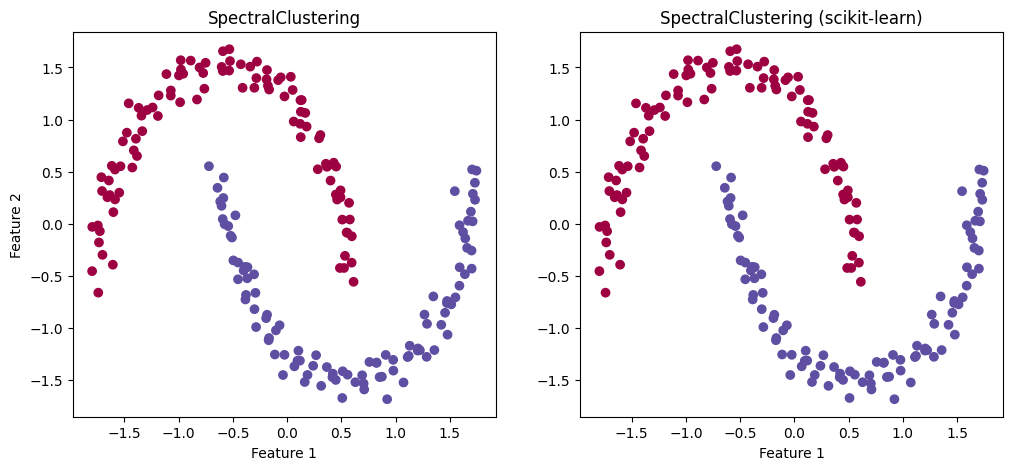

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X3[:, 0], X3[:, 1], c=sc_pred_res, cmap='Spectral')
plt.title('SpectralClustering')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(122)
plt.scatter(X3[:, 0], X3[:, 1], c=sk_sc_pred_res, cmap='Spectral')
plt.title('SpectralClustering (scikit-learn)')
plt.xlabel("Feature 1")

plt.show()

### **Pros and cons of Spectral Clustering**
Pros:
- working with clusters of complex shapes;
- the ability to process multidimensional data due to lower dimensionality before clustering;
- resistance to outliers and noise in data due to taking into account their global structure, not just local.

Cons:
- configuration complexity due to the large number of hyperparameters;
- high computational complexity and memory consumption when working with large amounts of data which can be partially solved using matrix-free methods or random projections.

### **Additional sources**
Paper «On Spectral Clustering: Analysis and an algorithm», Andrew Y. Ng, Michael I. Jordan, Yair Weiss.

Documentation:
- [SpectralClustering description](https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering);
- [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering).

Video:
- [one](https://www.youtube.com/playlist?list=PLiAulSm0XXgtkxss6TXOEffq3RhrsbYbV);
- [two](https://www.youtube.com/watch?v=jB6uVlQC9M4);
- [three](https://www.youtube.com/watch?v=cxTmmasBiC8).

<a name="dbscan"></a>
## **DBSCAN**
A more interesting clustering algorithm is DBSCAN (Density-Based Spatial Clustering of Applications with Noise), which is based on the density of points in space. It groups together points that are close to each other and marks as outliers points that lie in areas with low density. In addition to the fact that DBSCAN can detect clusters of arbitrary shape and outliers in data, its main feature is to independently determine the required number of clusters which eliminates the need for their selection.

To calculate pairwise distances and nearest neighbors of points in DBSCAN, a modified implementation of k-nearest neighbors is used which is an unsupervised learning algorithm and is presented in scikit-learn as the [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) class.

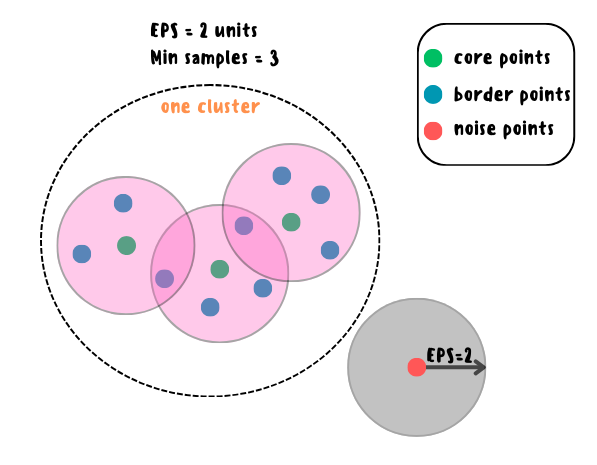

### **How DBSCAN works**
The most important parameters affecting the clustering result are *eps* (the maximum allowable distance between points to be considered neighbors) and *min_samples* (the minimum number of points in the vicinity of another point to be considered a base point). The points themselves in the data are divided into 3 types:
- **Core points** are points in the cluster that have *min_samples* neighbors in their environment *eps* or more. This means that the points lie in an area of high data density.
- **Border points** are points in the cluster that have fewer than *min_samples* neighbors in their *eps* environment, but lie surrounded by *eps* other base points. This means that the points lie on the border of the clusters.
- **Noise points** are outliers that do not belong to any cluster, that are the points are located in an area of low data density.

**The algorithm is built as follows**:
- 1) initially all cluster labels are marked as noise;
- 2) after that for each point in its environment there are neighbors and based on them, the base points are selected;
- 3) based on the base points and neighbors in their environment using the _dbscan_inner method, the cluster labels are updated which will be the final prediction.

**_dbscan_inner is constructed as follows**:
- 1) the unlabeled base points are assigned the current labels and they are added to the queue for further processing;
- 2) there are neighbors from this queue for each base point, where each unlabeled neighbor is assigned the current label and it is added to the queue from step 1;
- 3) next, the current label is increased by 1 and step 2 is repeated until the queue becomes empty.

As the result of this process each point is assigned a label of the corresponding cluster to which it belongs. Points that do not belong to any cluster remain noisy with a -1 label.

### **Python implementation from scratch**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_circles
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [ ]:
class DBSCANClustering:
    def __init__(self, eps=0.5, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30):
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
        self.algorithm = algorithm
        self.leaf_size = leaf_size

    @staticmethod
    def _dbscan_inner(core_points, neighborhoods, labels):
        label, queue = 0, []

        for point in range(len(core_points)):
            # if the point is already assigned a label or not a core point, skip it
            if not core_points[point] or labels[point] != -1:
                continue

            labels[point] = label
            queue.append(point)

            while queue:
                current_point = queue.pop(0)
                # if the point is a core point, get it's neighbors
                if core_points[current_point]:
                    current_neighbors = neighborhoods[current_point]

                    for neighbor in current_neighbors:
                        if labels[neighbor] == -1:
                            labels[neighbor] = label
                            queue.append(neighbor)

            label += 1

    def fit_predict(self, X):
        nn = NearestNeighbors(n_neighbors=self.min_samples, radius=self.eps, metric=self.metric,
                              algorithm=self.algorithm, leaf_size=self.leaf_size)

        # find the neighbors for each point within the given radius
        neighborhoods = nn.fit(X).radius_neighbors(X, return_distance=False)
        labels = np.full(len(X), -1, dtype=np.intp)
        core_points = np.asarray([len(n) >= self.min_samples for n in neighborhoods])

        self._dbscan_inner(core_points, neighborhoods, labels)
        self.labels_ = labels

        return self.labels_

### **Uploading a dataset**

In [ ]:
X4, y4 = make_circles(n_samples=250, noise=0.05, factor=0.5, random_state=0)
X4 = StandardScaler().fit_transform(X4)
print(y4)

[1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1
 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1]


### **Model training and evaluation of the obtained results**
As you can see DBSCAN also made an excellent job with clustering complex data, but choosing the optimal eps and min_samples in practice can be quite a difficult task, since these parameters significantly affect the results of clustering.

This problem can be partially solved using HDBSCAN is a modification of DBSCAN that automatically finds the appropriate eps value for each cluster using a hierarchical approach which allows you to identify clusters of different densities and increase resistance to outliers.

Another interesting modification similar to HDBSCAN is OPTICS (Ordering Points To Identify the Clustering Structure) which uses an achievability graph that determines the achievable distance for each point, which then will be related to the nearest cluster. This approach makes it even better to identify clusters of different densities, especially if they are located close to each other but this increases the running time of the algorithm.

**DBSCAN**

In [ ]:
dbscan = DBSCANClustering(eps=0.3, min_samples=3)
dbscan_pred_res = dbscan.fit_predict(X4)
dbscan_ari = adjusted_rand_score(y4, dbscan_pred_res)
print(f'Adjusted Rand Score for DBSCAN: {dbscan_ari}', '', sep='\n')
print('prediction', dbscan_pred_res, sep='\n')

Adjusted Rand Score for DBSCAN: 1.0

prediction
[0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0]


**DBSCAN (scikit-learn)**

In [ ]:
sk_dbscan = DBSCAN(eps=0.3, min_samples=3)
sk_dbscan_pred_res = sk_dbscan.fit_predict(X4)
sk_dbscan_ari = adjusted_rand_score(y4, sk_dbscan_pred_res)
print(f'Adjusted Rand Score for sk DBSCAN: {sk_dbscan_ari}', '', sep='\n')
print('prediction', sk_dbscan_pred_res, sep='\n')

Adjusted Rand Score for sk DBSCAN: 1.0

prediction
[0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0]


**Predictions visualization**

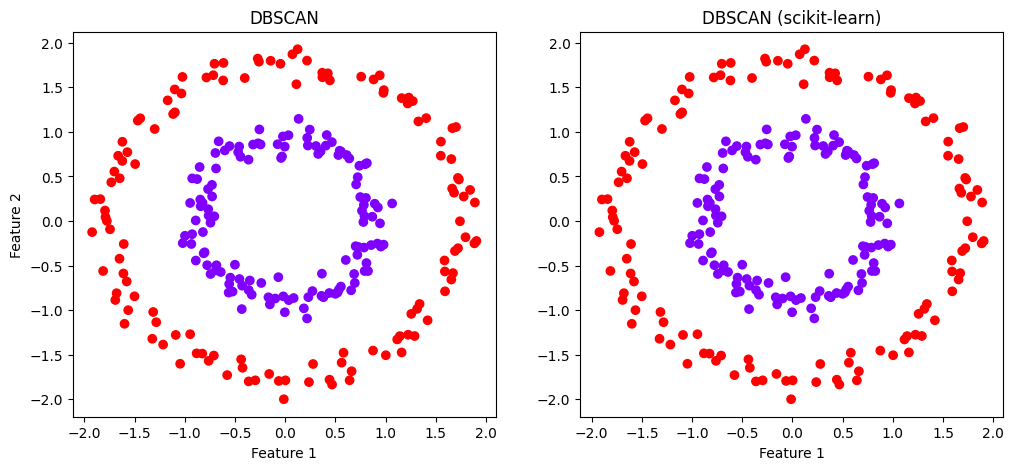

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X4[:, 0], X4[:, 1], c=dbscan_pred_res, cmap='rainbow')
plt.title('DBSCAN')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X4[:, 0], X4[:, 1], c=sk_dbscan_pred_res, cmap='rainbow')
plt.title('DBSCAN (scikit-learn)')
plt.xlabel("Feature 1")

plt.show()

### **Pros and cons of DBSCAN**
Pros:
- resistant to outliers;
- you don't need to specify the number of clusters in advance;
- the ability to find clusters of arbitrary shape as well as noisy points in the data.

Cons:
- poor performance with clusters of different densities;
- requires a large amount of memory to store the distances between all points;
- high sensitivity to the choice of eps and min_samples parameters which can greatly affect the quality of clustering in a negative way.

### **Additional sources**
Papers:
- «DBSCAN: Optimal Rates For Density-Based Cluster Estimation», Daren Wang, Xinyang Lu and Alessandro Rinaldo;
- «HDBSCAN: Density based Clustering over Location Based Services», Md Farhadur Rahman, Weimo Liu Saad Bin Suhaim, Saravanan Thirumuruganathan, Nan Zhang, Gautam Das;
- «OPTICS: Ordering Points To Identify the Clustering Structure», Mihael Ankerst, Markus M. Breunig, Hans-Peter Kriegel, Jörg Sander.

Documentation:
- [DBSCAN description](https://scikit-learn.org/stable/modules/clustering.html#dbscan);
- [HDBSCAN description](https://scikit-learn.org/stable/modules/clustering.html#hdbscan);
- [OPTICS description](https://scikit-learn.org/stable/modules/clustering.html#optics);
- [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html);
- [HDBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.HDBSCAN.html#sklearn.cluster.HDBSCAN);
- [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS).

Video:
- DBSCAN:
 - [one](https://www.youtube.com/watch?v=RDZUdRSDOok);
 - [two](https://www.youtube.com/watch?v=1RDyVAoFKgY);
 - [three](https://www.youtube.com/watch?v=C3r7tGRe2eI).

- HDBSCAN:
 - [one](https://www.youtube.com/watch?v=dGsxd67IFiU);
 - [two](https://www.youtube.com/watch?v=5lqIusur-Io).

- OPTICS:
 - [one](https://www.youtube.com/watch?v=oSvqADO6FEA);
 - [two](https://www.youtube.com/watch?v=2Gy34bM_OS8).


<a name="affinity_propagation"></a>
## **Affinity Propagation**
An even more advanced approach relative to the previous clustering algorithm is the Affinity Propagation method which is based on the concept of the relationship between data and the selection of examplars from them are the most representative samples which are represented by cluster centroids and group all other data near them.

The relationships between the data are described using the similarity matrix S, availability matrix A and responsibility matrix R, and the most important parameters when configuring the algorithm are *damping* (attenuation factor, which prevents the algorithm from changing its mind too quickly about which data points are best match each other) and *preference* (a measure of a point's preference to be an examplar for itself or for other points: the higher this value, the more likely it is to be an examplar).

### **How Affinity Propagation works**
Let's look at the following example to better understand the essence of this algorithm on an intuitive level. Imagine that there are many students in the school who want to find their friends. Each student has his own preferences with whom he wants to be friends, based on common interests, character, appearance, and so on. For example, one student likes football, another student likes music, and a third student likes math. These preferences can be measured by a number that shows how much a student wants to be friends with another student. This is called similarity: the greater it is, the more likely the students will become friends.

In this case Affinity propagation is an algorithm that helps students find their friends based on their preferences as follows:
- First, each student evaluates how much he wants to be friends with other students. For example, student A may say that he wants to be friends with student B on 8 out of 10, with student C on 6 out of 10, with student D on 4 out of 10, and so on. These scores can be calculated using negative quadratic Euclidean distance and written as a similarity matrix, where each row and column corresponds to a student, and each cell contains similarities between two students.

- Then each student sends messages to other students telling them how much he wants them to be his friends. This is called responsibility. Responsibility is the degree to which a student chooses another student as their friend. Responsibility depends not only on the similarity, but also on how much other students want to be friends with the same student. For example, if student A wants to be friends with student B, but student B does not want to be friends with student A, then Student A's responsibility to student B will be low. Well, if student A wants to be friends with student C and student C also wants to be friends with student A, then Student A's responsibility to student C will be high. Responsibility can be calculated using the formula:

$$r(i, k) = s(i, k) - \max_{k' \neq k} \{ a(i, k') + s(i, k') \}$$

where r(i, k) is the responsibility of student i to student k, s(i, k) is the similarity of student i to student k, a(i, k') is the availability of student i to student k', which will be explained further. Responsibility can also be written as a matrix, where each row and column corresponds to a student and each cell contains responsibility between two students.

- Next, each student receives messages from other students in which they say how much they want him to be their friend. This is called availability. Availability is the degree to which a student is suitable to be a friend to another student. Availability depends not only on responsibility, but also on how well other students are suitable for the role of friends for the same student. For example, if student A wants to be friends with student B and student B wants to be friends with student A, then Student A's availability to student B will be high. Well, if student A wants to be friends with student C but student C does not want to be friends with student A, then the availability of student A to student C will be low. Availability can be calculated using the formula:

$$a(i, k) = \min \{ 0, r(k, k) + \sum_{i' \neq i, k} \max \{ 0, r(i', k) \} \}$$

where a(i, k) is the availability of student i to student k, r(k, k) is the responsibility of student k to himself, r(i', k) is the responsibility of another student i' to student k. Availability can also be written as a matrix, where each row and column corresponds to a student, and each cell contains availability between two students.

- The algorithm repeats these steps until it finds the optimal solution in which each student has a friend. This friend is called an examplar. Examplars are students who are best suited to be friends to other students. The number of examplars depends on what preferences are set for the students. If preferences are not specified, then they are equal to the median of similarities. Examplars can be determined by the formula:

$$e(i) = \arg \max_k \{ r(i, k) + a(i, k) \}$$

where e(i) is an examplar of student i, r(i, k) is the responsibility of student i to student k, a(i, k) is the availability of student i to student k. This formula means that student i chooses as his friend the student k for whom the sum of responsibility and availability is maximum. If student i chooses himself as his friend, then he is an examplar. If student i chooses another student k as his friend, then he belongs to the same cluster as student k. A cluster is a group of students who have the same examplar friend.

**This algorithm is constructed as follows**:
- 1) based on the negative quadratic distance, the similarity matrix is found and the availability and responsibility matrices are initialized with zeros;
- 2) degenerations are removed from the similarity matrix and a small noise is added;
- 3) next, the values of the availability and responsibility matrices are iteratively updated based on the temporary matrix, initially presented as the sum of the similarity and availability matrices in order to find the maximum similarity between data points and potential instances;
- 4) the maximum column values are calculated from this matrix as well as the second largest values which are used to subtract from the similarity matrix to obtain a new responsibility matrix;
- 5) When updating the availability matrix values the temporary matrix is filled with positive values of the responsibility matrix in order to calculate the sum of messages between points about how much they want to be examplars.
- 6) then the sum of the columns is subtracted from this matrix to get a negative availability matrix and the temporary matrix is trimmed to zero to get a positive availability matrix;
- 7) also when updating the values of the availability and responsibility matrix, a damping coefficient is applied to the temporary matrix to avoid numerical fluctuations when updating the values;
- 8) examplars with a positive amount of responsibility and availability become cluster centers;
- 9) after each iteration the convergence condition of the algorithm is checked using the instance convergence matrix: if the number of examplars doesn't change during a given number of iterations or if the number of iterations reaches a maximum, then the algorithm stops;
- 10) in the end the final set of examplars and cluster labels is clarified by selecting the best examplars for each cluster from its members based on the maximum amount of similarities between them;
- 11) the resulting cluster labels will be the final prediction.

### **Python implementation from scratch**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import euclidean_distances, adjusted_rand_score

In [ ]:
class AffinityPropagationClustering:
    def __init__(self, damping=0.5, max_iter=200, convergence_iter=15, preference=None, random_state=0):
        self.damping = damping
        self.max_iter = max_iter
        self.convergence_iter = convergence_iter
        self.preference = preference
        self.random_state = random_state

    @staticmethod
    def _affinity_propagation_inner(similarity_matrix, preference, convergence_iter, max_iter,
                                   damping, random_state):
        rng = np.random.RandomState(random_state)
        n_samples = similarity_matrix.shape[0]
        samples_indexes = np.arange(n_samples)

        # place preference on the diagonal of similarity matrix
        similarity_matrix.flat[:: (n_samples + 1)] = preference
        availability_matrix = np.zeros((n_samples, n_samples))
        responsibility_matrix = np.zeros((n_samples, n_samples))  # initialize messages
        exemplars_convergence_matrix = np.zeros((n_samples, convergence_iter))

        # remove degeneracies
        similarity_matrix += (np.finfo(similarity_matrix.dtype).eps * similarity_matrix +
                              np.finfo(similarity_matrix.dtype).tiny * 100) * \
                              rng.standard_normal(size=(n_samples, n_samples))

        for iter in range(max_iter):
            temp_matrix = availability_matrix + similarity_matrix   # compute responsibilities
            max_indexes = np.argmax(temp_matrix, axis=1)
            max_values = temp_matrix[samples_indexes, max_indexes]
            temp_matrix[samples_indexes, max_indexes] = -np.inf
            second_max_values = np.max(temp_matrix, axis=1)

            # temp_matrix = new_responsibility_matrix
            np.subtract(similarity_matrix, max_values[:, None], temp_matrix)
            max_responsibility = similarity_matrix[samples_indexes, max_indexes] - second_max_values
            temp_matrix[samples_indexes, max_indexes] = max_responsibility

            # damping
            temp_matrix *= 1 - damping
            responsibility_matrix *= damping
            responsibility_matrix += temp_matrix

            # temp_matrix = Rp; compute availabilities
            np.maximum(responsibility_matrix, 0, temp_matrix)
            temp_matrix.flat[:: n_samples + 1] = responsibility_matrix.flat[:: n_samples + 1]

            # temp_matrix = -new_availability_matrix
            temp_matrix -= np.sum(temp_matrix, axis=0)
            diag_availability_matrix = np.diag(temp_matrix).copy()
            temp_matrix.clip(0, np.inf, temp_matrix)
            temp_matrix.flat[:: n_samples + 1] = diag_availability_matrix

            # damping
            temp_matrix *= 1 - damping
            availability_matrix *= damping
            availability_matrix -= temp_matrix

            # check for convergence
            exemplar = (np.diag(availability_matrix) + np.diag(responsibility_matrix)) > 0
            exemplars_convergence_matrix[:, iter % convergence_iter] = exemplar
            n_exemplars = np.sum(exemplar, axis=0)

            if iter >= convergence_iter:
                exemplars_sum = np.sum(exemplars_convergence_matrix, axis=1)
                unconverged = np.sum((exemplars_sum == convergence_iter) +
                                     (exemplars_sum == 0)) != n_samples

                if (not unconverged and (n_exemplars > 0)) or (iter == max_iter):
                    break

        exemplar_indixes = np.flatnonzero(exemplar)
        n_exemplars = exemplar_indixes.size  # number of detected clusters

        if n_exemplars > 0:
            cluster_indices = np.argmax(similarity_matrix[:, exemplar_indixes], axis=1)
            cluster_indices[exemplar_indixes] = np.arange(n_exemplars)  # Identify clusters

            # refine the final set of exemplars and clusters and return results
            for k in range(n_exemplars):
                cluster_members = np.where(cluster_indices == k)[0]
                best_k = np.argmax(np.sum(similarity_matrix[cluster_members[:, np.newaxis],
                                                            cluster_members], axis=0))
                exemplar_indixes[k] = cluster_members[best_k]

            cluster_indices = np.argmax(similarity_matrix[:, exemplar_indixes], axis=1)
            cluster_indices[exemplar_indixes] = np.arange(n_exemplars)
            labels = exemplar_indixes[cluster_indices]

            # Reduce labels to a sorted, gapless, list
            cluster_centers_indices = np.unique(labels)
            labels = np.searchsorted(cluster_centers_indices, labels)
        else:
            cluster_centers_indices = []
            labels = np.array([-1] * n_samples)

        return cluster_centers_indices, labels

    def fit_predict(self, X):
        self.affinity_matrix_ = -euclidean_distances(X, squared=True)

        if self.preference is None:
            self.preference = np.median(self.affinity_matrix_)

        params = (self.affinity_matrix_, self.preference, self.convergence_iter, self.max_iter,
                  self.damping, self.random_state)

        self.cluster_centers_indices_, self.labels_ = self._affinity_propagation_inner(*params)
        self.cluster_centers_ = X[self.cluster_centers_indices_]

        return self.labels_

In [ ]:
def plot_connected_points(X, labels, centers, cmap):
    for i in range(len(X)):
        color = cmap(labels[i] / len(centers))
        plt.plot([X[i, 0], centers[labels[i], 0]], [X[i, 1], centers[labels[i], 1]], c=color, alpha=0.8)

### **Uploading a dataset**

In [ ]:
X5, y5 = make_blobs(n_samples=300, centers=9, cluster_std=0.5, random_state=0)
print(y5)

[1 1 1 6 5 7 0 3 2 5 8 4 1 2 0 1 6 2 1 6 6 0 6 2 5 5 5 8 8 4 7 3 8 8 0 7 4
 6 2 0 4 4 7 1 7 5 8 0 5 4 0 3 8 8 2 2 4 7 6 7 4 5 4 5 3 8 4 8 8 4 6 6 2 3
 7 7 4 8 4 1 4 8 7 3 7 8 6 1 3 7 5 0 8 3 5 2 4 2 2 2 7 4 6 2 2 7 5 5 7 2 7
 0 5 7 1 5 3 2 8 3 1 4 2 1 8 5 1 5 5 2 2 1 6 7 4 3 3 3 5 3 6 6 6 5 4 4 2 8
 6 5 7 0 8 8 8 1 6 1 6 6 0 7 7 6 0 8 0 3 6 4 7 3 1 6 0 0 4 1 5 6 1 2 1 0 8
 3 0 7 5 4 3 0 5 2 1 4 6 1 0 0 0 3 8 5 0 6 0 1 5 4 8 2 4 0 1 6 3 7 0 8 4 8
 1 8 1 5 0 0 7 5 4 4 3 0 7 3 2 4 3 5 0 7 6 1 0 7 1 3 5 1 7 3 6 7 6 2 1 3 8
 5 2 3 1 4 6 2 3 8 0 1 6 2 7 6 0 7 1 4 3 5 4 0 2 2 2 1 8 8 7 3 2 0 3 2 3 6
 5 8 2 3]


### **Model training and evaluation of the obtained results**
Affinity Propagation showed excellent results without setting parameters determining correctly not only the number of clusters, but also assigning labels to all data points. This algorithm is also capable of showing good results for clusters of any shape and density, however parameter settings may be required, but it is still easier than in the case of DBSCAN or HDBSCAN.

**AffinityPropagation**

In [ ]:
ap = AffinityPropagationClustering()
ap_pred_res = ap.fit_predict(X5)
ap_ari = adjusted_rand_score(y5, ap_pred_res)
print(f'Adjusted Rand Score for AffinityPropagation: {ap_ari}', '', sep='\n')
print('prediction', ap_pred_res, sep='\n')

Adjusted Rand Score for AffinityPropagation: 1.0

prediction
[1 1 1 7 6 0 8 5 2 6 3 4 1 2 8 1 7 2 1 7 7 8 7 2 6 6 6 3 3 4 0 5 3 3 8 0 4
 7 2 8 4 4 0 1 0 6 3 8 6 4 8 5 3 3 2 2 4 0 7 0 4 6 4 6 5 3 4 3 3 4 7 7 2 5
 0 0 4 3 4 1 4 3 0 5 0 3 7 1 5 0 6 8 3 5 6 2 4 2 2 2 0 4 7 2 2 0 6 6 0 2 0
 8 6 0 1 6 5 2 3 5 1 4 2 1 3 6 1 6 6 2 2 1 7 0 4 5 5 5 6 5 7 7 7 6 4 4 2 3
 7 6 0 8 3 3 3 1 7 1 7 7 8 0 0 7 8 3 8 5 7 4 0 5 1 7 8 8 4 1 6 7 1 2 1 8 3
 5 8 0 6 4 5 8 6 2 1 4 7 1 8 8 8 5 3 6 8 7 8 1 6 4 3 2 4 8 1 7 5 0 8 3 4 3
 1 3 1 6 8 8 0 6 4 4 5 8 0 5 2 4 5 6 8 0 7 1 8 0 1 5 6 1 0 5 7 0 7 2 1 5 3
 6 2 5 1 4 7 2 5 3 8 1 7 2 0 7 8 0 1 4 5 6 4 8 2 2 2 1 3 3 0 5 2 8 5 2 5 7
 6 3 2 5]


**AffinityPropagation (scikit-learn)**

In [ ]:
sk_ap = AffinityPropagation()
sk_ap_pred_res = sk_ap.fit_predict(X5)
sk_ap_ari = adjusted_rand_score(y5, sk_ap_pred_res)
print(f'Adjusted Rand Score for sk AffinityPropagation: {sk_ap_ari}', '', sep='\n')
print('prediction', sk_ap_pred_res, sep='\n')

Adjusted Rand Score for sk AffinityPropagation: 1.0

prediction
[1 1 1 7 6 0 8 5 2 6 3 4 1 2 8 1 7 2 1 7 7 8 7 2 6 6 6 3 3 4 0 5 3 3 8 0 4
 7 2 8 4 4 0 1 0 6 3 8 6 4 8 5 3 3 2 2 4 0 7 0 4 6 4 6 5 3 4 3 3 4 7 7 2 5
 0 0 4 3 4 1 4 3 0 5 0 3 7 1 5 0 6 8 3 5 6 2 4 2 2 2 0 4 7 2 2 0 6 6 0 2 0
 8 6 0 1 6 5 2 3 5 1 4 2 1 3 6 1 6 6 2 2 1 7 0 4 5 5 5 6 5 7 7 7 6 4 4 2 3
 7 6 0 8 3 3 3 1 7 1 7 7 8 0 0 7 8 3 8 5 7 4 0 5 1 7 8 8 4 1 6 7 1 2 1 8 3
 5 8 0 6 4 5 8 6 2 1 4 7 1 8 8 8 5 3 6 8 7 8 1 6 4 3 2 4 8 1 7 5 0 8 3 4 3
 1 3 1 6 8 8 0 6 4 4 5 8 0 5 2 4 5 6 8 0 7 1 8 0 1 5 6 1 0 5 7 0 7 2 1 5 3
 6 2 5 1 4 7 2 5 3 8 1 7 2 0 7 8 0 1 4 5 6 4 8 2 2 2 1 3 3 0 5 2 8 5 2 5 7
 6 3 2 5]


**Predictions visualization**

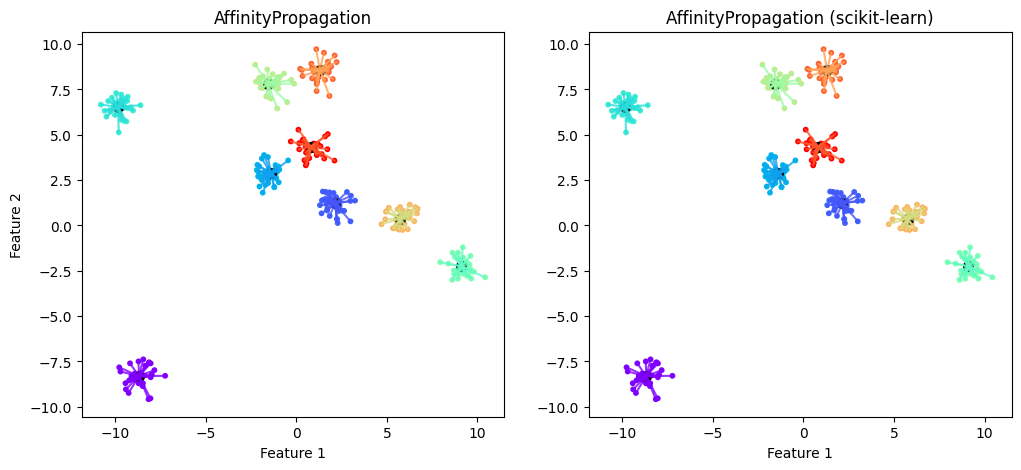

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X5[:, 0], X5[:, 1], c=ap_pred_res, cmap='rainbow', s=10)
plt.scatter(ap.cluster_centers_[:, 0], ap.cluster_centers_[:, 1], c='black', s=50)
plt.title('AffinityPropagation')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plot_connected_points(X5, ap_pred_res, ap.cluster_centers_, plt.cm.rainbow)

plt.subplot(122)
plt.scatter(X5[:, 0], X5[:, 1], c=sk_ap_pred_res, cmap='rainbow', s=10)
plt.scatter(sk_ap.cluster_centers_[:, 0], sk_ap.cluster_centers_[:, 1], c='black', s=50)
plt.title('AffinityPropagation (scikit-learn)')
plt.xlabel("Feature 1")
plot_connected_points(X5, sk_ap_pred_res, sk_ap.cluster_centers_, plt.cm.rainbow)

plt.show()

### **Pros and cons of Affinity Propagation**
Pros:
- high accuracy;
- automatic detection of the number of clusters;
- not sensitive to the choice of initial values;
- a small number of hyperparameters to adjust.

Cons:
- possible sensitivity to outliers and noise in the data;
- high complexity in terms of execution time and memory usage which makes it difficult to apply it to large data.

Despite the fact that Affinity Propagation is far from the fastest algorithm, at the moment there are several modifications that can significantly increase its speed. Among the most interesting modifications are the following:
- Hierarchical Affinity Propagation (HAP) is a clustering algorithm using Affinity Propagation several times at different data levels. First, examplars are found on a small subset of the data which are then applied to the entire dataset. This approach allows you to reduce the execution time and reduce the number of messages transmitted between points, however this may affect the quality of clustering.
- Fast Affinity Propagation is a modification based on message clipping, which is based on two main ideas. First, the size of the similarity matrix is reduced by selecting a small subset of examplars as prototype candidates, as well as calculating the similarity only between them and all other examplars. Secondly, a multidimensional search is used to determine the preference parameter by dividing the range of possible preference values into several subintervals and running the algorithm on each of them in parallel. Then the subinterval that gives the best clustering quality according to some established criterion is selected.
- Affinity Propagation based on density peaks is a two-step clustering algorithm (DDAP) that first determines density peaks in data using the DDC (Density peaks and Distance-based Clustering) algorithm and then uses the standard Affinity Propagation to search for instances that are close to these peaks. This approach allows you to significantly reduce the number of calculations with comparable clustering quality.

### **Additional sources**
Papers:
- «Extended Affinity Propagation: Global Discovery and Local Insights», Rayyan Ahmad Khan, Rana Ali Amjad, Martin Kleinsteuber;
- «Hierarchical Affinity Propagation», Inmar E. Givoni, Clement Chung, Brendan J. Frey;
- «Fast Affinity Propagation Clustering based on Machine Learning», Shailendra Kumar Shrivastava, Dr. J.L. Rana and Dr. R.C. Jain;
- «Fast Clustering by Affinity Propagation Based on Density Peaks», Yang Li, Chonghui Guo, Leilei Sun.

Documentation:
- [Affinity Propagation description](https://scikit-learn.org/stable/modules/clustering.html#affinity-propagation);
- [Affinity Propagation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html).

Video:
- [one](https://www.youtube.com/watch?v=DW4bi7XuRXg);
- [two](https://www.youtube.com/watch?v=3eeYmhss5hU).